# LEAD SCORE - CASE STUDY

### Problem Statement

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals and Objectives 

There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [4]:
#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Setting the display options rows and max columns:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 800)

## Importing & Inspecting Dataset

In [7]:
#Reading & understanding the data.
lead1 = pd.read_csv('Leads.csv')
lead1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [8]:
#checking the no of rows and columns of the data 
lead1.shape

(9240, 37)

In [9]:
#checking the numeric values of the data 
lead1.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [10]:
#checking the entire information that needs to be inspected
lead1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Cleaning the Dataset

In [11]:
#looking for duplicates in Prospect ID
sum(lead1.duplicated(subset = 'Prospect ID')) == 0

True

In [12]:
#looking for duplicates in Lead Number column 
sum(lead1.duplicated(subset = 'Lead Number')) == 0

True

In [13]:
#dropping 2 columns not relevant to our study and replacing select values with NaN (Since it means no option is selected)
lead1.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)
lead1 = lead1.replace('Select', np.nan)

In [14]:
#checking for null values
lead1.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [15]:
#Checking the percentage of missing values
round(100*(lead1.isnull().sum()/len(lead1.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [16]:
#Removing all the columns that have 45% null values
cols=lead1.columns
for i in cols:
    if((100*(lead1[i].isnull().sum()/len(lead1.index))) >= 45):
        lead1.drop(i, 1, inplace = True)

In [17]:
#rechecking the percentage of missing values
round(100*(lead1.isnull().sum()/len(lead1.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

## Data Preparation & EDA

In [19]:
#checking target column
Converted = round(sum(lead1['Converted'])/len(lead1['Converted'].index)*100)
Converted

39

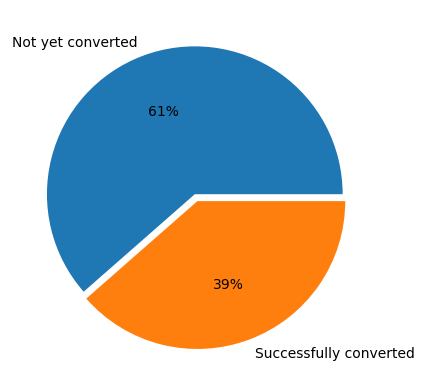

In [20]:
#visualizing Converted column
plt.pie(lead1['Converted'].value_counts(normalize=True)*100,labels=['Not yet converted','Successfully converted'], explode=(0,0.05),autopct='%1.0f%%')
plt.show()

In [21]:
#seeing count of unique values in Country column
lead1['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

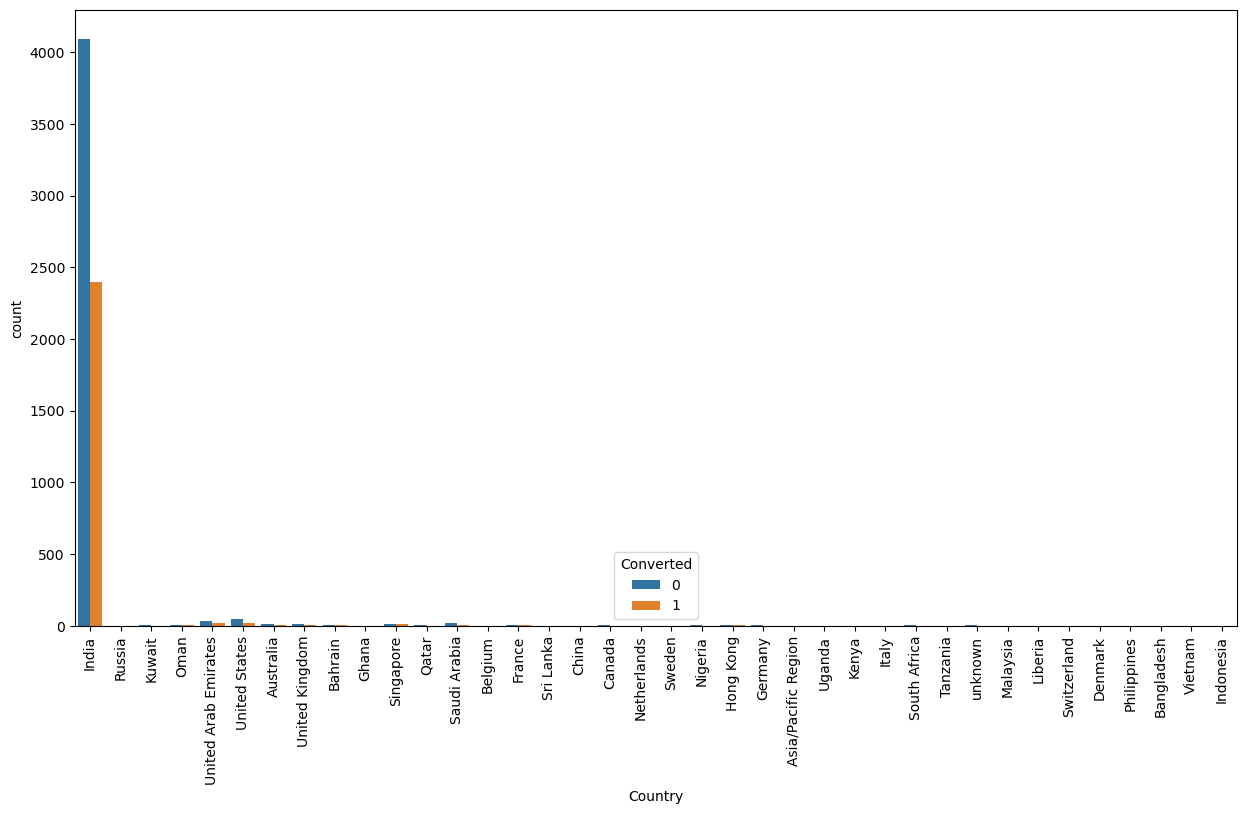

In [22]:
#visualizing Country column 
plt.figure(figsize=(15,8))
s1=sns.countplot(lead1.Country, hue=lead1.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [23]:
#imputing null values in Country column
lead1['Country'] = lead1['Country'].replace(np.nan,'India')
lead1['Country'].value_counts(dropna=False)

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [24]:
#dropping Country column
col_drop= ['Country']

In [25]:
#seeing count of unique values in Specialization column
lead1['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [26]:
#imputing null values in Specializaton column
lead1['Specialization'] = lead1['Specialization'].replace(np.nan, 'Not Specified')

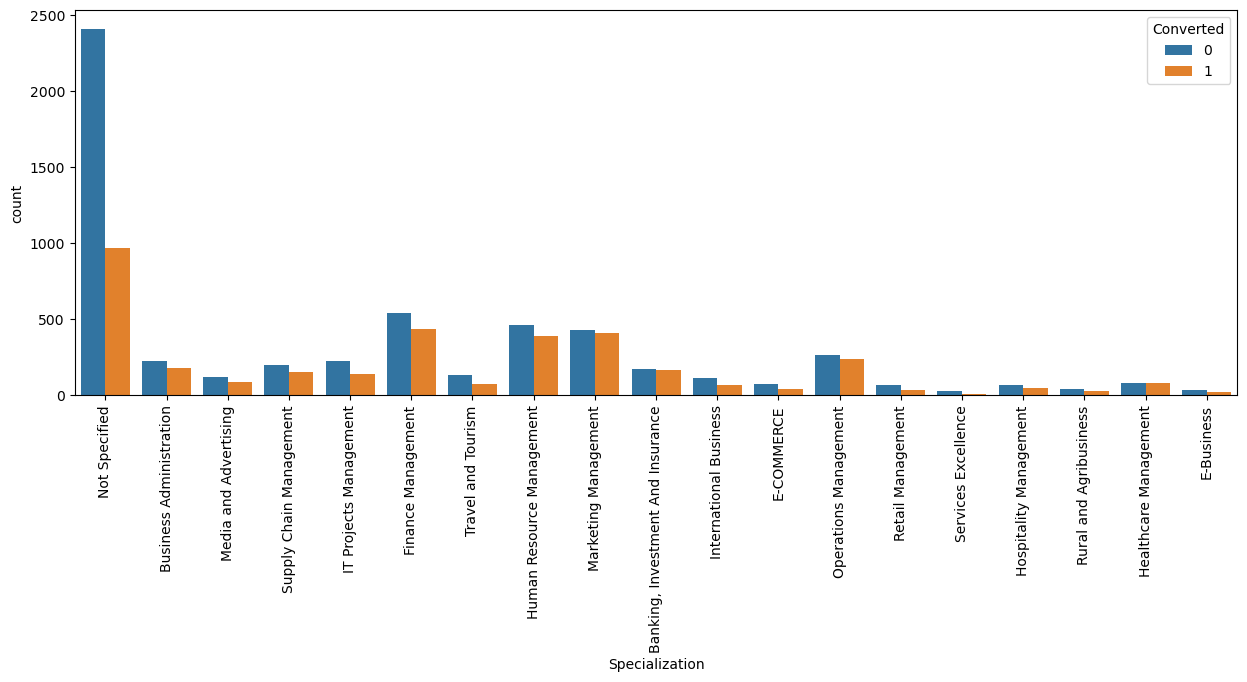

In [27]:
#visualizing Specializaton column
plt.figure(figsize=(15,5))
s1=sns.countplot(lead1.Specialization, hue=lead1.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [28]:
#replacing values in Specialization column
lead1['Specialization'] = lead1['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management',
                          'IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management',
                          'Retail Management'] ,'Management_Specializations')  
lead1['Specialization'].value_counts(dropna=False)

Management_Specializations           4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [29]:
#seeing count of unique values in City column
lead1['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [30]:
#imputing null values in City column
lead1['City'] = lead1['City'].replace(np.nan,'Mumbai')

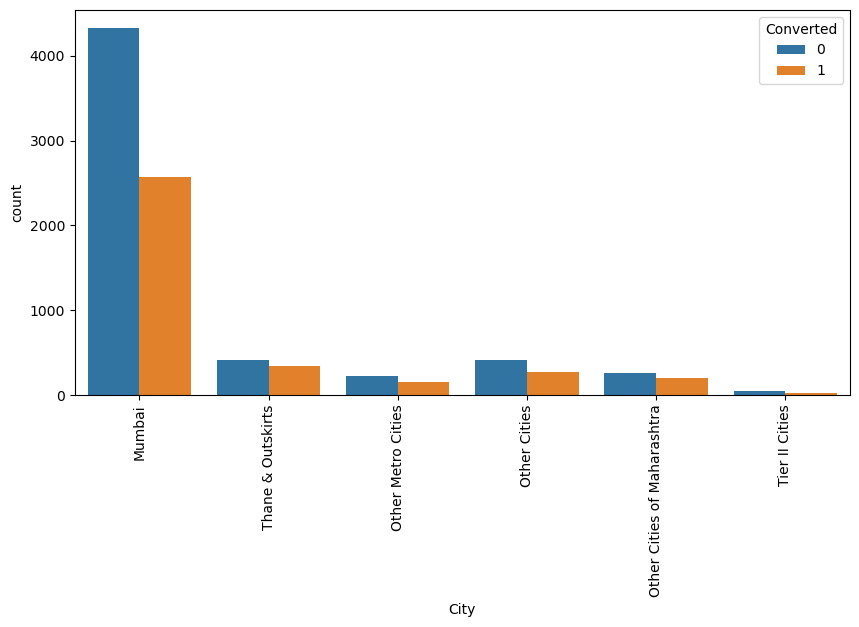

In [31]:
#visualizing City column
plt.figure(figsize=(10,5))
s1=sns.countplot(lead1.City, hue=lead1.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [ ]:
#seeing count of unique values in What is your current occupation column
lead1['What is your current occupation'].value_counts(dropna=False)

In [32]:
#imputing null values in What is your current occupation column

lead1['What is your current occupation'] = lead1['What is your current occupation'].replace(np.nan, 'Unemployed')
lead1['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

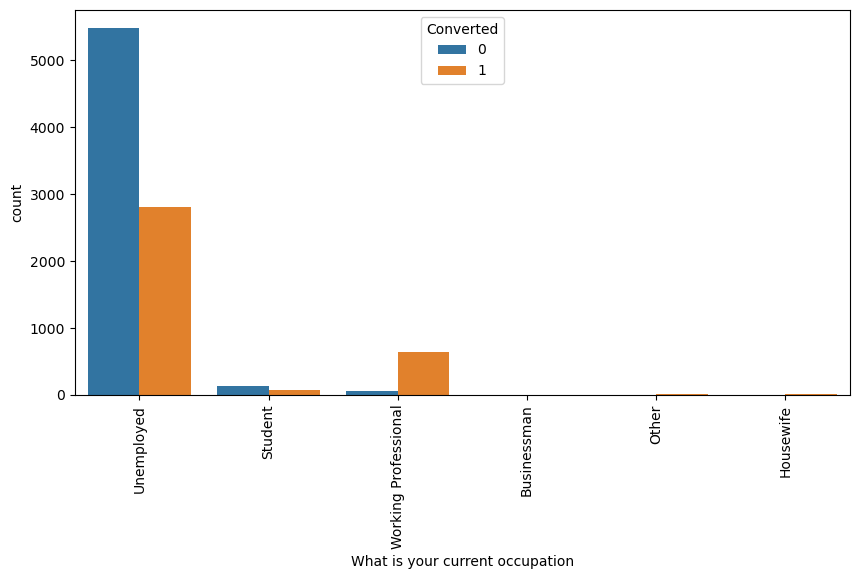

In [33]:
#visualizing What is your current occupation column
plt.figure(figsize=(10,5))
s1=sns.countplot(lead1['What is your current occupation'], hue=lead1.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [34]:
#seeing count of unique values in Tags column

lead1['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [35]:
#imputing null values in Tags column
lead1['Tags'] = lead1['Tags'].replace(np.nan,'Not Specified')

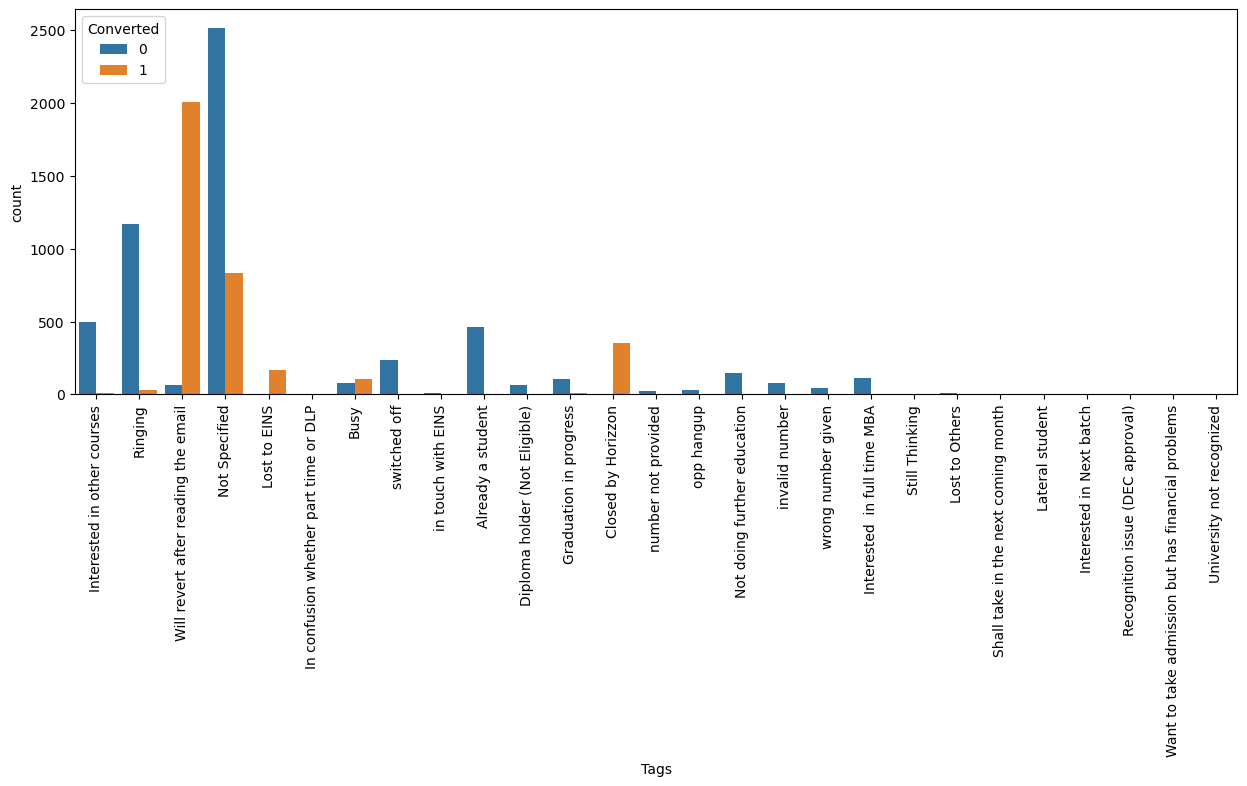

In [36]:
#visualizing Tags column
plt.figure(figsize=(15,5))
s1=sns.countplot(lead1['Tags'], hue=lead1.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [37]:
#replacing values in Tags column
lead1['Tags'] = lead1['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education',
                                    'invalid number','wrong number given','Interested  in full time MBA'] , 'Other_Tags')

In [38]:
#rechecking the percentage of missing values
round(100*(lead1.isnull().sum()/len(lead1.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [39]:
#seeing count of unique values in What matters most to you in choosing a course column
lead1['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [40]:
#imputing null values in What matters most to you in choosing a course column
lead1['What matters most to you in choosing a course'] = lead1['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

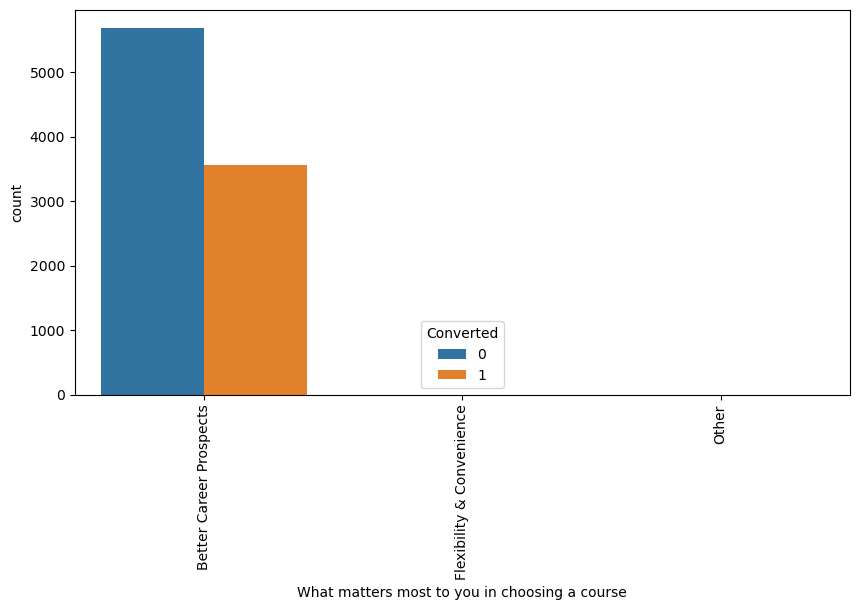

In [41]:
#visualizing What matters most to you in choosing a course column
plt.figure(figsize=(10,5))
s1=sns.countplot(lead1['What matters most to you in choosing a course'], hue=lead1.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [42]:
#seeing count of unique values in What matters most to you in choosing a course column
lead1['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [43]:
#dropping the What matters most to you in choosing a course column
col_drop.append('What matters most to you in choosing a course')
col_drop

['Country', 'What matters most to you in choosing a course']

In [ ]:
#seeing count of unique values in Lead Source column
lead1['Lead Source'].value_counts(dropna=False)

In [44]:
#imputing and replacing values in Lead Source column

lead1['Lead Source'] = lead1['Lead Source'].replace(np.nan,'Others')
lead1['Lead Source'] = lead1['Lead Source'].replace('google','Google')
lead1['Lead Source'] = lead1['Lead Source'].replace('Facebook','Social Media')
lead1['Lead Source'] = lead1['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads','testone','NC_EDM'] ,'Others') 

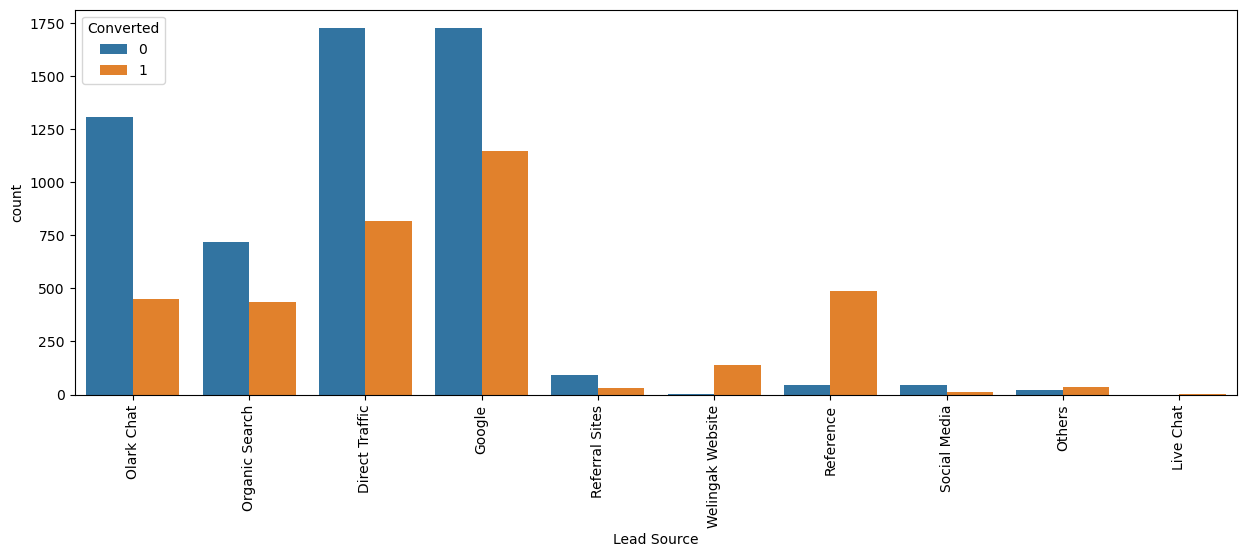

In [45]:
#visualizing Lead Source column
plt.figure(figsize=(15,5))
s1=sns.countplot(lead1['Lead Source'], hue=lead1.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [46]:
#seeing count of unique values in Last Activity column

lead1['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [47]:
#imputing values and seeing count of unique values in Last Activity column
lead1['Last Activity'] = lead1['Last Activity'].replace(np.nan,'Others')
lead1['Last Activity'] = lead1['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation', 
                         'Approached upfront','View in browser link Clicked','Email Marked Spam',                  
                         'Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Others')

lead1['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

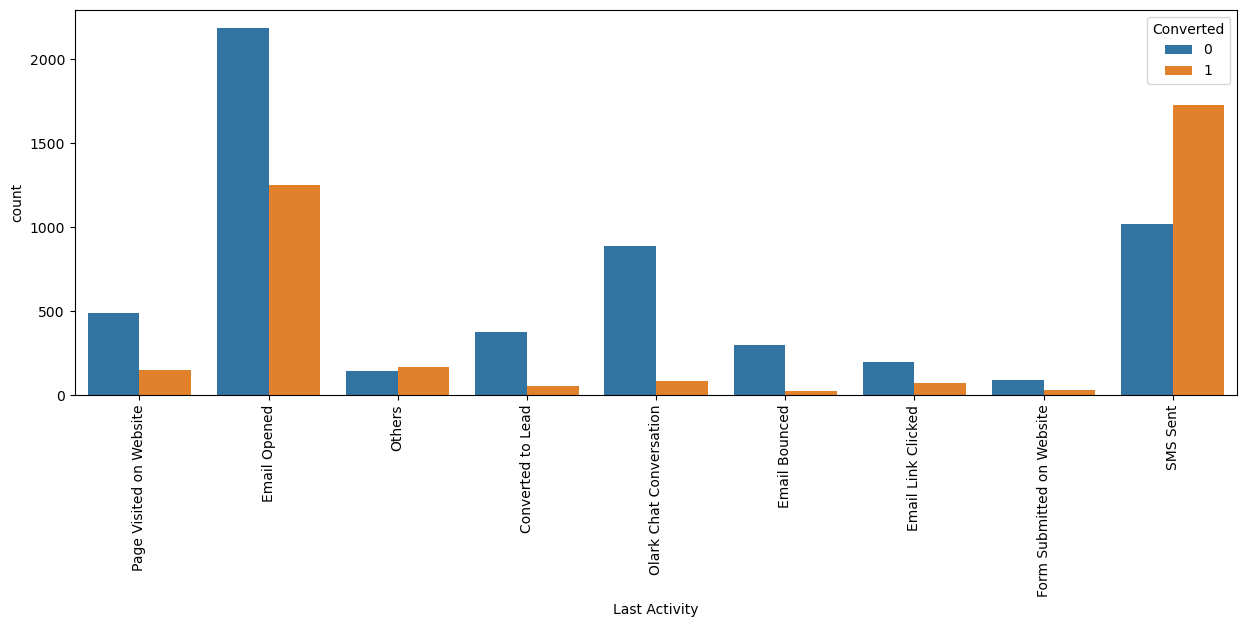

In [48]:
#visualizing Lead Source column
plt.figure(figsize=(15,5))
s1=sns.countplot(lead1['Last Activity'], hue=lead1.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [49]:
# Checking the percentage of missing values
round(100*(lead1.isnull().sum()/len(lead1.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [50]:
# Removing all the null values that are not required 
lead1 = lead1.dropna()
round(100*(lead1.isnull().sum()/len(lead1.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [51]:
#seeing count of unique values in Lead Origin column
lead1['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

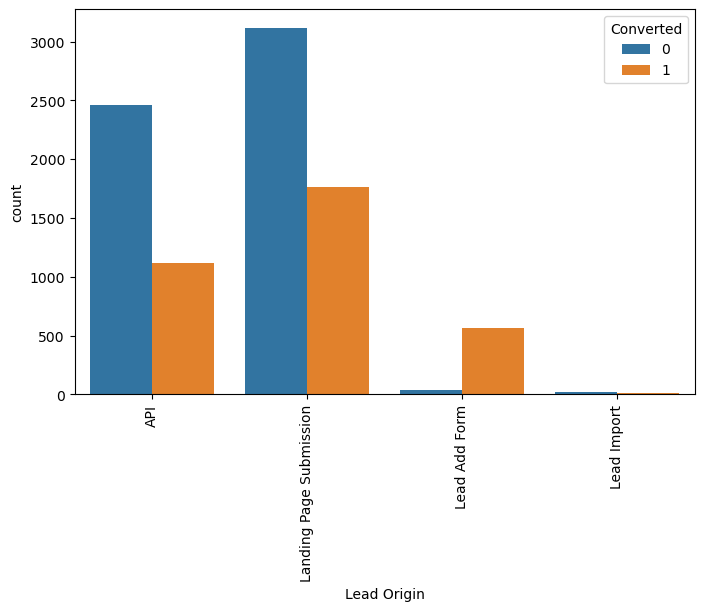

In [52]:
#visualizing Lead Origin column
plt.figure(figsize=(8,5))
s1=sns.countplot(lead1['Lead Origin'], hue=lead1.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

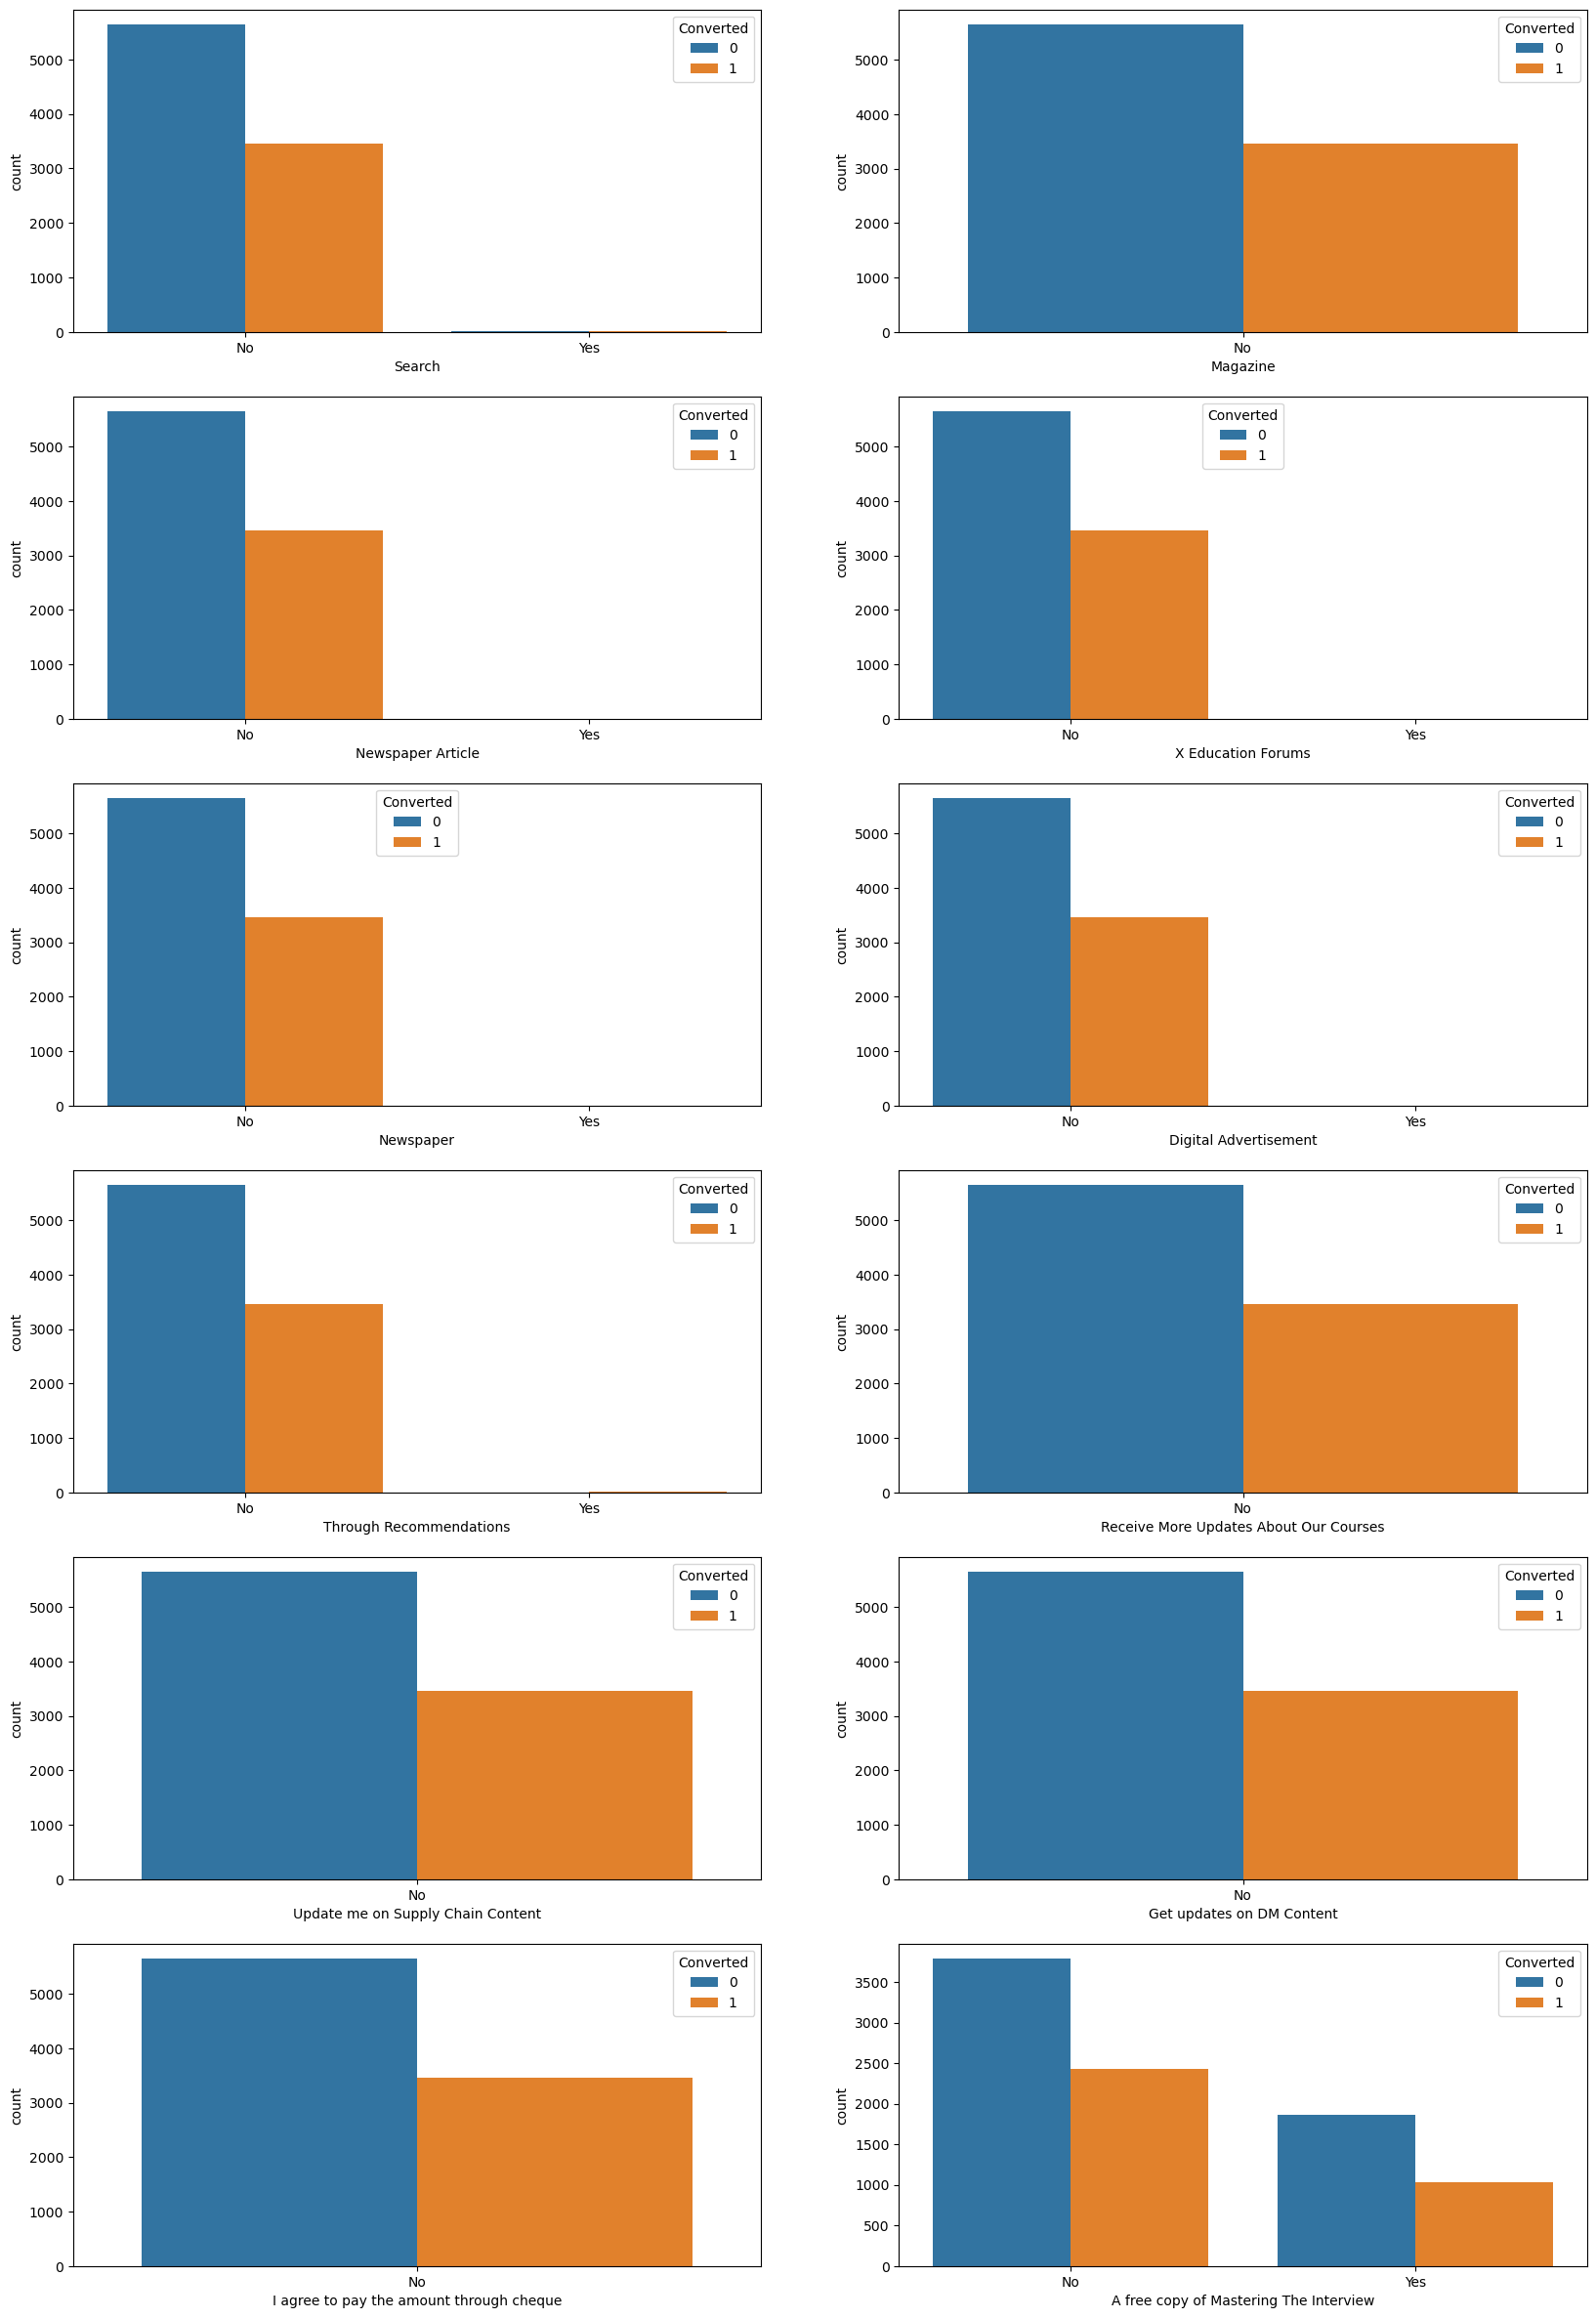

In [53]:
#plotting most of the categorical columns of the data
fig, axs = plt.subplots(6,2,figsize = (20,30))
sns.countplot(x = "Search", hue = "Converted", data = lead1, ax = axs[0,0])
sns.countplot(x = "Magazine", hue = "Converted", data = lead1, ax = axs[0,1])
sns.countplot(x = "Newspaper Article", hue = "Converted", data = lead1, ax = axs[1,0])
sns.countplot(x = "X Education Forums", hue = "Converted", data = lead1, ax = axs[1,1])
sns.countplot(x = "Newspaper", hue = "Converted", data = lead1, ax = axs[2,0])
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = lead1, ax = axs[2,1])
sns.countplot(x = "Through Recommendations", hue = "Converted", data = lead1, ax = axs[3,0])
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = lead1, ax = axs[3,1])
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =lead1, ax = axs[4,0])
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = lead1, ax = axs[4,1])
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = lead1, ax = axs[5,0])
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = lead1, ax = axs[5,1])
plt.show()

In [54]:
#dropping columns that are not not relevant
col_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [55]:
#replacing values in Last Notable Activity column

lead1['Last Notable Activity'] = lead1['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                 'Unreachable','Unsubscribed','Email Bounced','Resubscribed to emails','View in browser link Clicked',
                                 'Approached upfront','Form Submitted on Website','Email Received'],'Other_Notable_activity')

In [57]:
#seeing count of unique values in Last Notable Activity column
lead1['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

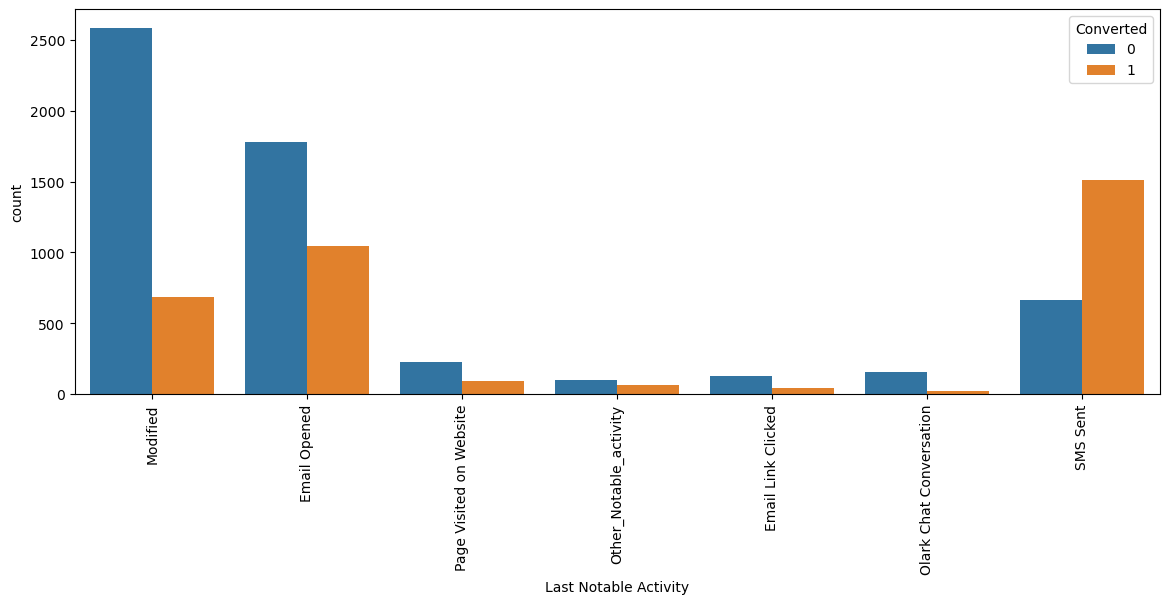

In [56]:
#visualizing Last Notable Activity column
plt.figure(figsize = (14,5))
ax1=sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

In [58]:
#dropping columns that are not relevant
col_drop

['Country',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [59]:
#checking the dataset after dropping columns
lead1 = lead1.drop(col_drop,1)
lead1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Do Not Call                             9103 non-null   object 
 4   Converted                               9103 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9103 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9103 non-null   object 
 9   Specialization                          9103 non-null   object 
 10  What is your current occupation         9103 non-null   obje

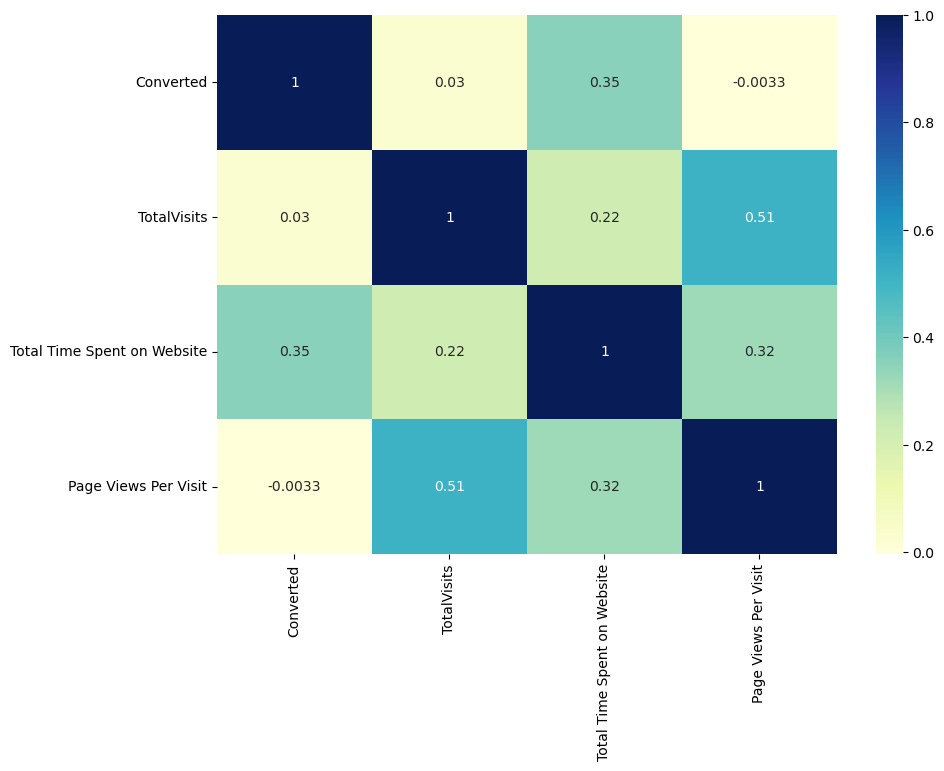

In [60]:
#plotting a heatmap of numerical variables
plt.figure(figsize=(10,7))
sns.heatmap(lead1.corr(), cmap="YlGnBu", annot=True)
plt.show()

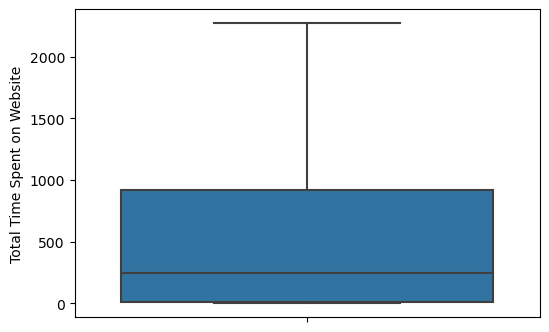

In [61]:
#visualizing Total Time Spent on Website column
plt.figure(figsize=(6,4))
sns.boxplot(y=lead1['Total Time Spent on Website'])
plt.show()

In [62]:
# percentile distribution of Total Time Spent on Website column
lead1['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

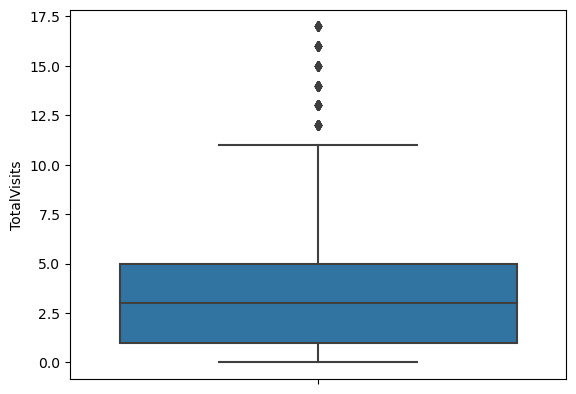

In [63]:
# visualizing percentile distribution of Total Time Spent on Website column
Q3 = lead1.TotalVisits.quantile(0.99)
lead1 = lead1[(lead1.TotalVisits <= Q3)]
Q1 = lead1.TotalVisits.quantile(0.01)
lead1 = lead1[(lead1.TotalVisits >= Q1)]
sns.boxplot(y=lead1['TotalVisits'])
plt.show()

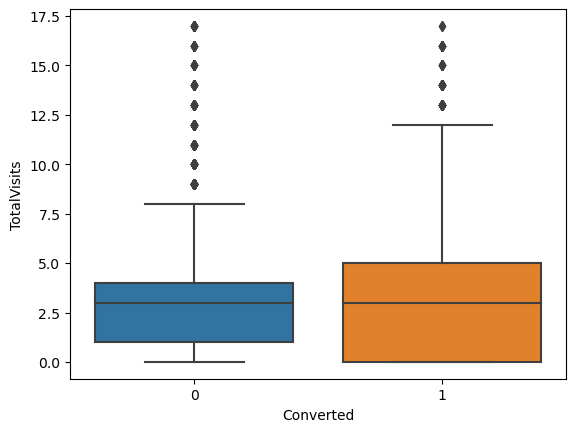

In [64]:
#visualizing Total Visits column
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead1)
plt.show()

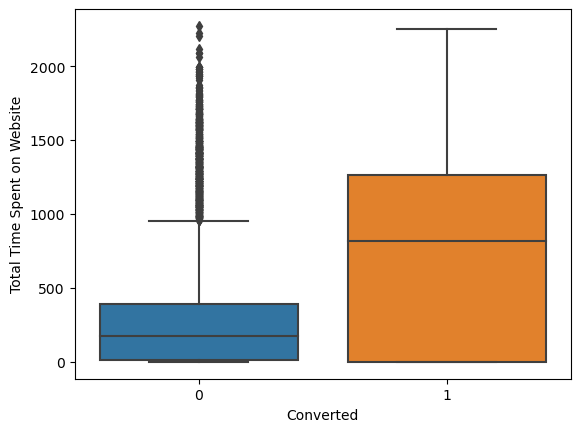

In [65]:
#visualizing Total Time Spent on Website column
sns.boxplot(x=lead1.Converted, y=lead1['Total Time Spent on Website'])
plt.show()

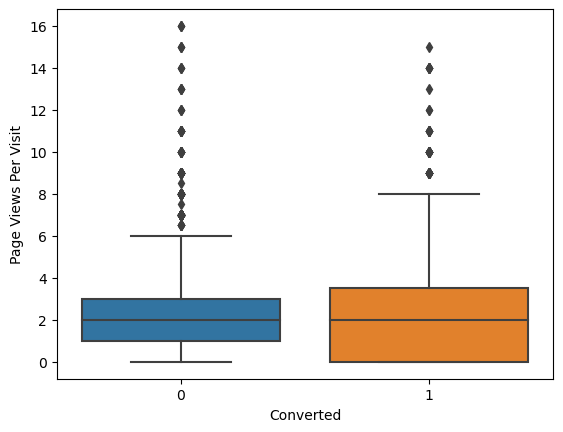

In [67]:
#visualizing Page Views Per Visit column
sns.boxplot(x=lead1.Converted, y=lead1['Page Views Per Visit'])
plt.show()

## Creating Dummy Variables

In [68]:
#creating a dataframe for all object type columns
category= lead1.select_dtypes(include=['object']).columns
category

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [69]:
#Converting binary variables to 1/0
var =  ['A free copy of Mastering The Interview','Do Not Email']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

lead1[var] = lead1[var].apply(binary_map)

In [70]:
## Imputing dummy variables from categorical columns

dummy = pd.get_dummies(lead1[['Lead Origin','What is your current occupation','City']], drop_first=True)
lead1 = pd.concat([lead1,dummy],1)


dummy = pd.get_dummies(lead1['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
lead1 = pd.concat([lead1, dummy], axis = 1)


dummy = pd.get_dummies(lead1['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
lead1 = pd.concat([lead1, dummy], axis = 1)


dummy = pd.get_dummies(lead1['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
lead1 = pd.concat([lead1, dummy], axis = 1)


dummy = pd.get_dummies(lead1['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
lead1 = pd.concat([lead1, dummy], axis = 1)


dummy = pd.get_dummies(lead1['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
lead1 = pd.concat([lead1, dummy], axis = 1)

lead1.drop(category,1,inplace = True)

In [71]:
#checking the data
lead1.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


## Test-Train Split

In [72]:
#importing the required library and putting the target variable in y

from sklearn.model_selection import train_test_split
y = lead1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [73]:
#Splitting data into X and y
X=lead1.drop('Converted', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [74]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
2873,0.271781,0.031598,0.814423,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
6823,1.276480,2.389158,2.274024,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
7258,-1.067817,-0.874028,-1.131710,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8327,1.611379,1.982176,0.167334,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
5940,-0.732918,-0.701703,-0.645177,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Model Building

In [75]:
#Importing Logistic Regression

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

#Running RFE with 15 variables as output
from sklearn.feature_selection import RFE
rfe = RFE(logreg,n_features_to_select=15)          
rfe = rfe.fit(X_train, y_train)

In [76]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False,  True,  True,  True,  True,
        True,  True])

In [77]:
#Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 26),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 24),
 ('What is your current occupation_Housewife', False, 16),
 ('What is your current occupation_Other', False, 37),
 ('What is your current occupation_Student', False, 28),
 ('What is your current occupation_Unemployed', False, 27),
 ('What is your current occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 36),
 ('City_Other Cities of Maharashtra', False, 35),
 ('City_Other Metro Cities', False, 38),
 ('City_Thane & Outskirts', False, 40),
 ('City_Tier II Cities', False, 23),
 ('Specialization_Banking, Investment And Insurance', False, 18),
 ('Specialization_Business Administration', False, 22),
 ('Specialization_E-Business', False, 21),
 ('Specialization_E-COMMERCE', False, 20),
 ('Specialization_International Business', Fa

In [78]:
# Putting all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [79]:
# Selecting all the columns selected by RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Reference'

In [80]:
#creating the first model
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6314
Model:                            GLM   Df Residuals:                     6298
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1240.1
Date:                Sun, 16 Apr 2023   Deviance:                       2480.3
Time:                        12:52:32   Pearson chi2:                 1.08e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6062
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6037      0.116     -5.206      0.000      -0.831      -0.376
Total Time Spent on Website                              1.0660      0.060     17.722      0.000       0.948       1.184
Lead Origin_Lead Add Form                                0.9574      0.434      2.206      0.027       0.107       1.808
What is your current occupation_Working Professional     1.0771      0.394      2.737      0.006       0.306       1.849
Lead Source_Direct Traffic                              -1.4227      0.170     -8.380      0.000      -1.755      -1.090
Lead Source_Google                                      -0.9694      0.153     -6.320      0.000      -1.270      -0.669
Lead Source_Organic Search                              -1.0046      0.195     -5.154      0.000      -1.387      -0.623
Lead Source_Welingak Website                             3.4483      0.848      4.068      0.000       1.787       5.110
Last Activity_SMS Sent                                   2.1447      0.117     18.345      0.000       1.916       2.374
Last Notable Activity_Modified                          -1.7156      0.127    -13.529      0.000      -1.964      -1.467
Tags_Closed by Horizzon                                  7.2653      1.023      7.105      0.000       5.261       9.270
Tags_Interested in other courses                        -2.0243      0.397     -5.098      0.000      -2.803      -1.246
Tags_Lost to EINS                                        6.0435      0.611      9.886      0.000       4.845       7.242
Tags_Other_Tags                                         -2.4043      0.213    -11.298      0.000      -2.821      -1.987
Tags_Ringing                                            -3.4428      0.244    -14.119      0.000      -3.921      -2.965
Tags_Will revert after reading the email                 4.3887      0.195     22.504      0.000       4.007       4.771
========================================================================================================================
"""

In [81]:
#creating a dataframe that will contain the names of all the feature variables and their respective VIFs

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Tags_Will revert after reading the email,1.96
1,Lead Origin_Lead Add Form,1.91
4,Lead Source_Google,1.82
3,Lead Source_Direct Traffic,1.79
7,Last Activity_SMS Sent,1.59
8,Last Notable Activity_Modified,1.58
12,Tags_Other_Tags,1.40
13,Tags_Ringing,1.37
5,Lead Source_Organic Search,1.35
6,Lead Source_Welingak Website,1.35


## Creating Prediction

In [82]:
#getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2873    0.998891
6823    0.999432
7258    0.037288
8327    0.992816
5940    0.011095
5686    0.999029
5372    0.999748
4736    0.042094
5812    0.997645
893     0.034724
dtype: float64

In [83]:
#reshaping the array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.99889086, 0.99943156, 0.03728842, 0.99281641, 0.01109544,
       0.99902938, 0.99974758, 0.04209426, 0.99764478, 0.03472443])

In [84]:
#creating a dataframe with given conversion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.998891,2873
1,1,0.999432,6823
2,0,0.037288,7258
3,1,0.992816,8327
4,0,0.011095,5940


In [85]:
#Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.998891,2873,1
1,1,0.999432,6823,1
2,0,0.037288,7258,0
3,1,0.992816,8327,1
4,0,0.011095,5940,0


## Model Evaluation

In [86]:
#Creating confusion matrix 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3777  160]
 [ 295 2082]]


In [87]:
#Checking the overall accuracy
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9279379157427938


In [88]:
#Substituting the value of true positive,true negative, false positive,false negative
TP = confusion[1,1] 
TN = confusion[0,0]
FP = confusion[0,1] 
FN = confusion[1,0]

In [89]:
#Calculating the sensitivity
TP / float(TP+FN)

0.8758939840134623

In [90]:
#Calculating the specificity
TN / float(TN+FP)

0.9593599187198374

In [92]:
#Calculating the precision
print (TP / float(TP+FP))

0.928635147190009


## Optimise Cut off (ROC Curve)

In [94]:
#creating ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [97]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

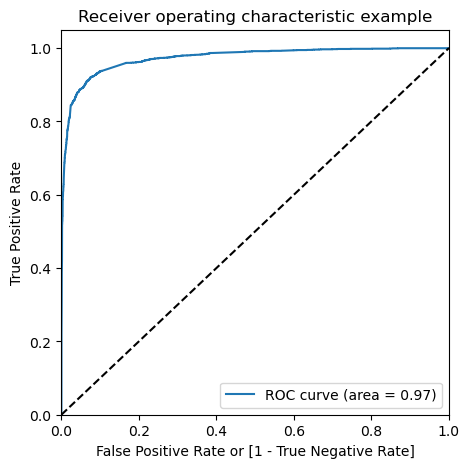

In [98]:
#plotting the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [99]:
#Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.998891,2873,1,1,1,1,1,1,1,1,1,1,1
1,1,0.999432,6823,1,1,1,1,1,1,1,1,1,1,1
2,0,0.037288,7258,0,1,0,0,0,0,0,0,0,0,0
3,1,0.992816,8327,1,1,1,1,1,1,1,1,1,1,1
4,0,0.011095,5940,0,1,0,0,0,0,0,0,0,0,0


In [100]:
#Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376465  1.000000  0.000000
0.1   0.1  0.832911  0.972234  0.748793
0.2   0.2  0.914634  0.935212  0.902210
0.3   0.3  0.923028  0.914178  0.928372
0.4   0.4  0.924929  0.896508  0.942088
0.5   0.5  0.927938  0.875894  0.959360
0.6   0.6  0.925879  0.851493  0.970790
0.7   0.7  0.914951  0.806899  0.980188
0.8   0.8  0.905923  0.775768  0.984506
0.9   0.9  0.885968  0.713504  0.990094


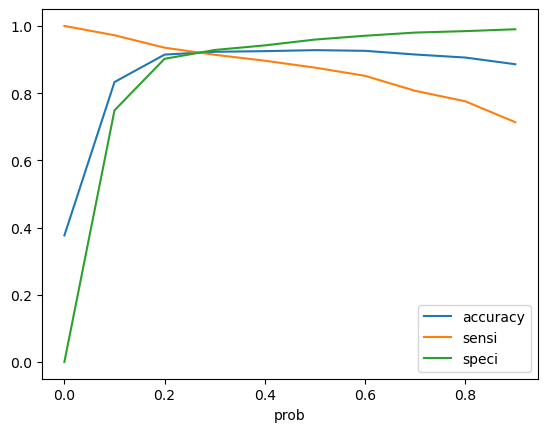

In [101]:
#Plotting the Optimal Cutoff Point
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [102]:
#using 0.3 as optimal cutoff point
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.998891,2873,1,1,1,1,1,1,1,1,1,1,1,1
1,1,0.999432,6823,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.037288,7258,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.992816,8327,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.011095,5940,0,1,0,0,0,0,0,0,0,0,0,0


In [103]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.998891,2873,1,100
1,1,0.999432,6823,1,100
2,0,0.037288,7258,0,4
3,1,0.992816,8327,1,99
4,0,0.011095,5940,0,1


In [104]:
#Checking the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9230281913208742

In [105]:
#Creating the confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3655,  282],
       [ 204, 2173]], dtype=int64)

In [106]:
#Substituting the value of true positive,true negative, false positive,false negative
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [107]:
#calculating Sensitivity
TP / float(TP+FN)

0.9141775347076146

In [108]:
#calculating Specificity 
TN / float(TN+FP)

0.9283718567437135

Accuracy = 92% , Sensitivity = 91% , Specificity = 93%

In [109]:
# Positive predictive value 
print (TP / float(TP+FP))

0.885132382892057


In [110]:
# Negative predictive value
print (TN / float(TN+ FN))

0.947136563876652


In [111]:
#creating confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3655,  282],
       [ 204, 2173]], dtype=int64)

In [112]:
#Calculating Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.885132382892057

In [113]:
#Calculating Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.9141775347076146

In [117]:
#Using sklearn utilities for the same
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.885132382892057

In [118]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9141775347076146

## Precision and Recall

In [119]:
#plotting Precision and Recall tradeoff
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

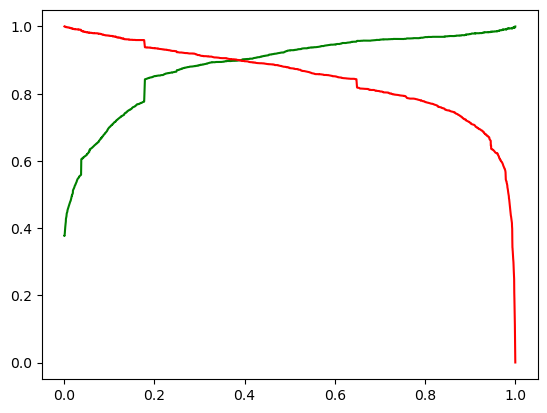

In [120]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Prediction on Test set

In [121]:
# Scaling numeric values on test set
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
5130,-1.083848,-0.896947,-1.137345,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6929,0.583516,-0.843508,1.268810,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1484,0.250043,-0.666606,0.787579,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
6519,-0.416903,2.016412,-0.174883,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
7472,-0.416903,1.657079,-0.174883,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [122]:
# Substituting all the columns in the final train model
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Modified,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
5130,-0.896947,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6929,-0.843508,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1484,-0.666606,0,0,0,1,0,0,1,1,0,0,0,0,1,0
6519,2.016412,0,0,0,0,1,0,1,0,0,0,0,0,1,0
7472,1.657079,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [123]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

In [124]:
#predictions on test set
y_test_pred = res.predict(X_test_sm)

In [125]:
#checking top 10 values
y_test_pred[:10]

5130    0.036421
6929    0.075334
1484    0.004979
6519    0.319321
7472    0.998118
7920    0.069425
3962    0.173668
6135    0.036421
8701    0.924991
5461    0.998011
dtype: float64

In [126]:
# Coverting it to df
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5130,0.036421
6929,0.075334
1484,0.004979
6519,0.319321
7472,0.998118


In [127]:
#Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index

In [128]:
#Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [129]:
#Appending y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [130]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,5130,0.036421
1,0,6929,0.075334
2,0,1484,0.004979
3,0,6519,0.319321
4,1,7472,0.998118


In [131]:
#Renaming column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,5130,0.036421
1,0,6929,0.075334
2,0,1484,0.004979
3,0,6519,0.319321
4,1,7472,0.998118


In [132]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,5130,0,0.036421,4
1,6929,0,0.075334,8
2,1484,0,0.004979,0
3,6519,0,0.319321,32
4,7472,1,0.998118,100


In [133]:
# Making prediction using cut off 0.3
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,5130,0,0.036421,4,0
1,6929,0,0.075334,8,0
2,1484,0,0.004979,0,0
3,6519,0,0.319321,32,1
4,7472,1,0.998118,100,1


In [134]:
#checking the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.917960088691796

In [135]:
#creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1523,  135],
       [  87,  961]], dtype=int64)

In [136]:
#Substituting the value of true positive,true negative, false positive,false negative
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [137]:
#Calculating Sensitivity
TP / float(TP+FN)

0.9169847328244275

In [138]:
#calculating Specificity 
TN / float(TN+FP)

0.9185765983112183

In [139]:
#calculating Precision 
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8768248175182481

In [140]:
#calculating Recall 
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9169847328244275

Accuracy : 92% , Sensitivity : 88% , Specificity : 92%

## Finding out the leads which should be contacted

In [146]:
#Finding the customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 80
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=80]
hot_leads

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
4,7472,1,0.998118,100,1
8,8701,1,0.924991,92,1
9,5461,1,0.998011,100,1
13,5137,1,0.998984,100,1
15,2346,1,0.997351,100,1
...,...,...,...,...,...
2690,4837,1,0.992043,99,1
2694,4508,1,0.999122,100,1
2695,2424,1,0.989692,99,1
2697,1146,1,0.994817,99,1


In [147]:
#Prospect ID of the customers to be contacted
print("The Prospect ID of the customers which should be contacted are :")

hot_leads_ids = hot_leads["Prospect ID"].values.reshape(-1)
hot_leads_ids

The Prospect ID of the customers which should be contacted are :


array([7472, 8701, 5461, 5137, 2346, 8038, 3951, 3721, 2853, 4772, 4068,
        447, 3095, 6252, 6438, 7234, 4990, 6325, 3556, 8348, 5937, 1675,
       7342, 7105, 2658,  802, 5250, 1673, 2785, 1534,  200, 1009, 5551,
       1737, 5087, 7098, 9043, 6330, 5623, 8576, 2789, 6301, 3522, 8235,
       5217,  517, 2005, 6021, 9115, 7433,  454, 8161, 1490, 8804, 7858,
       5659, 4131, 4388, 1171, 3123, 4703, 1527,  889, 5207, 4584,  211,
       6698, 4784, 7978, 2605, 4455, 1990, 2844, 2195, 8322, 2643, 1329,
       3881, 5007, 6040, 3412, 2019, 1398, 2020, 4021, 1200, 9003, 8950,
       5753, 6536, 8106, 5741, 8261, 5799, 8620, 8899, 4135, 5035, 3514,
       1079, 4428, 2342, 1469, 7340, 5306, 5576, 7849, 3589, 4645, 2854,
       6697, 2128,  622, 7408, 2913, 3875, 5666, 8177,  546, 4221, 7156,
       2696, 7764, 4675,  356, 5236, 4123, 5499, 7501, 8509, 1617, 1267,
       7989, 9107, 2762, 8895, 4216, 5479,  327, 2338, 7391,  727, 1290,
       3179, 7150, 2390, 3288, 6411, 2378, 6026, 77

In [148]:
#Finding out the Important Features from our final mode
res.params.sort_values(ascending=False)

Tags_Closed by Horizzon                                 7.265339
Tags_Lost to EINS                                       6.043520
Tags_Will revert after reading the email                4.388741
Lead Source_Welingak Website                            3.448296
Last Activity_SMS Sent                                  2.144663
What is your current occupation_Working Professional    1.077100
Total Time Spent on Website                             1.066035
Lead Origin_Lead Add Form                               0.957396
const                                                  -0.603677
Lead Source_Google                                     -0.969387
Lead Source_Organic Search                             -1.004611
Lead Source_Direct Traffic                             -1.422698
Last Notable Activity_Modified                         -1.715649
Tags_Interested in other courses                       -2.024251
Tags_Other_Tags                                        -2.404333
Tags_Ringing             